<a href="https://colab.research.google.com/github/HarinduR/Bank_Marketing_Using_Machine_Learning/blob/master/data_exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Bank Marketing using ML**
# CM2604 - Machine Learning
## Individual Coursework
### H K H R Induwara - 2330917 - 20230712

## Handle Raw dataset

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
file_path_additional_full = "/content/drive/MyDrive/MLCW/bank-additional-full.csv"

*   I load the Bank Additional Full dataset to prepare it as a clean dataset

In [4]:
dataset_full = pd.read_csv(file_path_additional_full, sep=";", engine='python')

In [5]:
dataset_full.shape

(41188, 21)

In [6]:
print(dataset_full.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [7]:
print(dataset_full.describe(include='all'))

                age     job  marital          education default housing  \
count   41188.00000   41188    41188              41188   41188   41188   
unique          NaN      12        4                  8       3       3   
top             NaN  admin.  married  university.degree      no     yes   
freq            NaN   10422    24928              12168   32588   21576   
mean       40.02406     NaN      NaN                NaN     NaN     NaN   
std        10.42125     NaN      NaN                NaN     NaN     NaN   
min        17.00000     NaN      NaN                NaN     NaN     NaN   
25%        32.00000     NaN      NaN                NaN     NaN     NaN   
50%        38.00000     NaN      NaN                NaN     NaN     NaN   
75%        47.00000     NaN      NaN                NaN     NaN     NaN   
max        98.00000     NaN      NaN                NaN     NaN     NaN   

         loan   contact  month day_of_week  ...      campaign         pdays  \
count   41188     41

In [8]:
print(dataset_full.isnull().sum())

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


In [9]:
for col in dataset_full.select_dtypes(include='object').columns:
    print(col)
    print(dataset_full[col].unique())

job
['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
marital
['married' 'single' 'divorced' 'unknown']
education
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
default
['no' 'unknown' 'yes']
housing
['no' 'yes' 'unknown']
loan
['no' 'yes' 'unknown']
contact
['telephone' 'cellular']
month
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
day_of_week
['mon' 'tue' 'wed' 'thu' 'fri']
poutcome
['nonexistent' 'failure' 'success']
y
['no' 'yes']


In [10]:
cleaned_file_path_full = "/content/drive/MyDrive/MLCW/bank_additional_full_cleaned.csv"
dataset_full.to_csv(cleaned_file_path_full, index=False)

print("Datasets successfully cleaned and saved!")

Datasets successfully cleaned and saved!


Check the shape of the dataset, overview of data types and null values, statistical summaries for numeric columns and save as a clean dataset with separete columns.

## Handle Unknown Value


In [11]:
file_path = "/content/drive/MyDrive/MLCW/bank_additional_full_cleaned.csv"
dataset = pd.read_csv(file_path)

In [12]:
dataset.shape

(41188, 21)

In [13]:
dataset.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [14]:
print(dataset.info())
print(dataset.describe(include='all'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [15]:
categorical_cols = ["job", "marital", "education", "default", "housing", "loan", "contact", "month", "day_of_week", "poutcome"]
for col in categorical_cols:
    print(f"Value counts for {col}:\n", dataset[col].value_counts())

Value counts for job:
 job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64
Value counts for marital:
 marital
married     24928
single      11568
divorced     4612
unknown        80
Name: count, dtype: int64
Value counts for education:
 education
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: count, dtype: int64
Value counts for default:
 default
no         32588
unknown     8597
yes            3
Name: count, dtype: int64
Value counts for housing:
 housing
yes        21576
no         18622
unknown      990
Name: count, dtype: int64
Value counts for 

In [16]:
for column in dataset.columns:
    print(column,dataset[column].nunique())

age 78
job 12
marital 4
education 8
default 3
housing 3
loan 3
contact 2
month 10
day_of_week 5
duration 1544
campaign 42
pdays 27
previous 8
poutcome 3
emp.var.rate 10
cons.price.idx 26
cons.conf.idx 26
euribor3m 316
nr.employed 11
y 2


In [17]:
dataset.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
housing,0
loan,0
contact,0
month,0
day_of_week,0


In [18]:
unknown_counts = dataset.isin(['unknown']).sum()

print(unknown_counts)

age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64


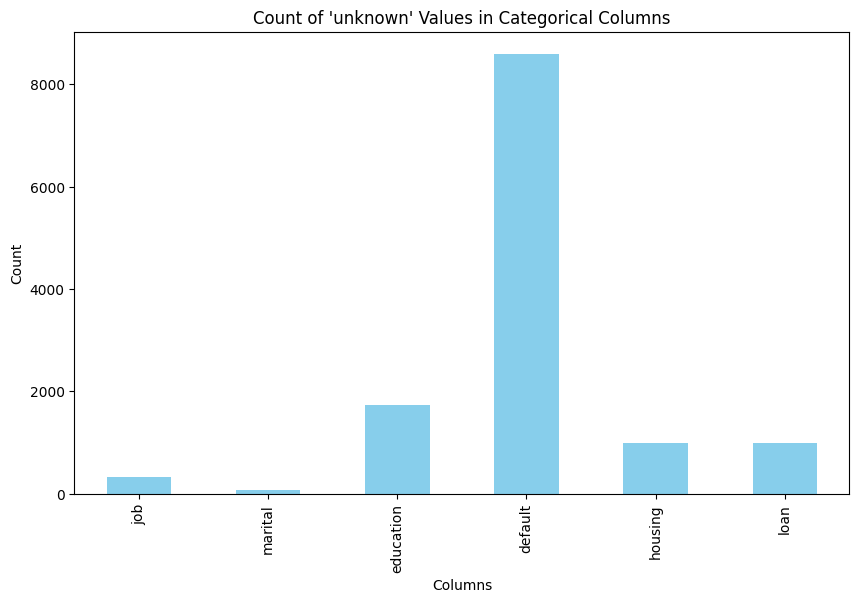

In [19]:
unknown_counts[unknown_counts > 0].plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title("Count of 'unknown' Values in Categorical Columns")
plt.xlabel("Columns")
plt.ylabel("Count")
plt.show()

In [20]:
unknown_percentages = (dataset.isin(['unknown']).sum() / len(dataset)) * 100

print(unknown_percentages)

age                0.000000
job                0.801204
marital            0.194231
education          4.202680
default           20.872584
housing            2.403613
loan               2.403613
contact            0.000000
month              0.000000
day_of_week        0.000000
duration           0.000000
campaign           0.000000
pdays              0.000000
previous           0.000000
poutcome           0.000000
emp.var.rate       0.000000
cons.price.idx     0.000000
cons.conf.idx      0.000000
euribor3m          0.000000
nr.employed        0.000000
y                  0.000000
dtype: float64


There are several unknown values in the dataset, which are labeled as "unknown" for missing values, as mentioned in the README file. I identified these values and calculated the percentage of rows they represent.

In [22]:
# Replace 'unknown' with 'other' in 'job' and 'education'
dataset['job'].replace('unknown', 'other', inplace=True)
dataset['education'].replace('unknown', 'other', inplace=True)

<ipython-input-22-74f2e79aea84>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['job'].replace('unknown', 'other', inplace=True)
<ipython-input-22-74f2e79aea84>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

I categorized the "unknown" values in the job and education features under a separate "Other" category. This decision was based on the assumption that these features cannot remain unknown, nor can a mode be defined for them. Therefore, I replaced "unknown" with the "Other" label.

In [23]:
# Replace 'unknown' with mode for 'marital', 'housing', and 'loan'
for col in ['marital', 'housing', 'loan']:
    mode_value = dataset[col].mode()[0]
    dataset[col].replace('unknown', mode_value, inplace=True)


<ipython-input-23-5790ebb37a2d>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset[col].replace('unknown', mode_value, inplace=True)


I used the mode to handle the unknown values in the marital, housing, and loan features. This decision was made because it is not possible to predict the actual values for the unknowns. Additionally, the percentage of unknown values for each feature is small, making the mode a suitable choice for these three features.


In [24]:
dataset.drop('default', axis=1, inplace=True)
dataset.drop('duration', axis=1, inplace=True)

The default column contains a high percentage of unknown values and has minimal impact on the target variable, so I decided to drop this feature. Additionally, I dropped the duration feature as it was mentioned as irrelevant in the README file.

In [25]:
dataset.head(10)

,age,job,marital,education,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,other,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [26]:
unknown_counts = dataset.isin(['unknown']).sum()

print(unknown_counts)

age               0
job               0
marital           0
education         0
housing           0
loan              0
contact           0
month             0
day_of_week       0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


In [27]:
dataset.shape

(41188, 19)

## Handle Duplicate

In [28]:
print(dataset.duplicated())

0        False
1        False
2        False
3        False
4        False
         ...  
41183    False
41184    False
41185    False
41186    False
41187    False
Length: 41188, dtype: bool


In [29]:
dataset.duplicated().sum()

2081

In [30]:
duplicate_rows = dataset[dataset.duplicated()]
print(duplicate_rows)

       age           job   marital            education housing loan  \
10      41   blue-collar   married                other      no   no   
11      25      services    single          high.school     yes   no   
16      35   blue-collar   married             basic.6y     yes   no   
31      59    technician   married                other     yes   no   
104     52        admin.  divorced    university.degree      no   no   
...    ...           ...       ...                  ...     ...  ...   
39985   27        admin.    single          high.school      no   no   
40401   31       student    single                other     yes   no   
40404   41  entrepreneur   married    university.degree     yes   no   
40806   35    technician   married  professional.course     yes   no   
40840   32        admin.    single    university.degree     yes   no   

         contact month day_of_week  campaign  pdays  previous     poutcome  \
10     telephone   may         mon         1    999      

In [31]:
dataframe = dataset.drop_duplicates()

In [32]:
dataset.duplicated().sum()

2081

In [35]:
dataset.shape

(41188, 19)

As the final step in the cleaning process, I handled duplicate values to eliminate data redundancy.

In [38]:
dataset.to_csv("/content/drive/MyDrive/MLCW/cleaned_dataset.csv", index=False)
print("Cleaned dataset saved successfully!")

Cleaned dataset saved successfully!
